In [179]:
import keras
import keras.utils
import numpy as np
import matplotlib.pyplot as plt
import keras.utils
from keras.layers import *
#from tensorflow.keras.preprocessing import image
from google_drive_downloader import GoogleDriveDownloader as gdd

In [180]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [181]:
x_train.shape

(60000, 28, 28)

In [182]:
x_test.shape

(10000, 28, 28)

In [183]:
type(x_train)

numpy.ndarray

In [184]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

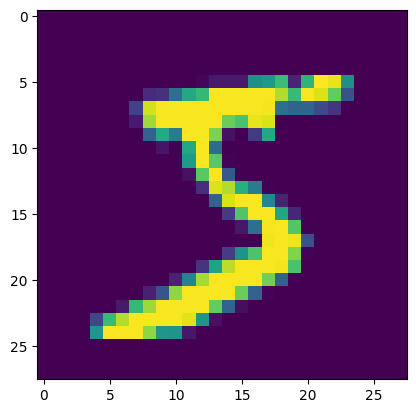

In [185]:
plt.imshow(x_train[0])

In [186]:
y_train[:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

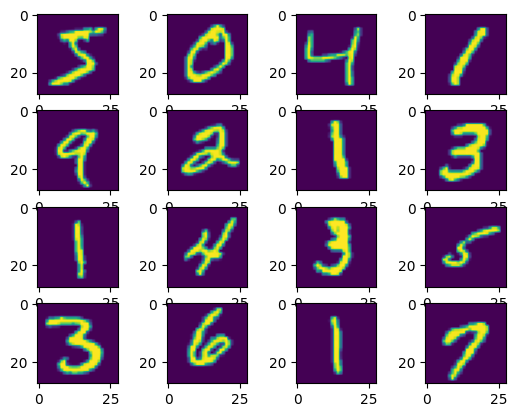

In [187]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])
plt.show()

In [188]:
input_shape = (28, 28, 1)

In [189]:
model_1 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50),
      Dense(1)
      ] )

In [190]:
model_1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

Обучение модели на не нормализованных данных бесполезно

In [191]:
%%time

history = model_1.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 5.3095e-07 - accuracy: 0.1053
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.3095e-07 - accuracy: 0.1053
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 5.3095e-07 - accuracy: 0.1053
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 5.3095e-07 - accuracy: 0.1053
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.3095e-07 - accuracy: 0.1053
CPU times: user 26.2 s, sys: 1.13 s, total: 27.4 s
Wall time: 28.5 s


Нормализация обучающего и тестового набора

In [192]:
x_train = x_train / 255
x_test = x_test / 255

In [193]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [194]:
model_2 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50,activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

In [195]:
model_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [196]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3076 - accuracy: 0.9141 - val_loss: 0.1758 - val_accuracy: 0.9500
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1542 - accuracy: 0.9559 - val_loss: 0.1332 - val_accuracy: 0.9604
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1148 - accuracy: 0.9669 - val_loss: 0.1128 - val_accuracy: 0.9664
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0934 - accuracy: 0.9727 - val_loss: 0.1105 - val_accuracy: 0.9660
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0771 - accuracy: 0.9767 - val_loss: 0.0983 - val_accuracy: 0.9707
CPU times: user 29.2 s, sys: 1.63 s, total: 30.8 s
Wall time: 31.4 s


313/313 [==============================] - 1s 2ms/step - loss: 0.0983 - accuracy: 0.9707


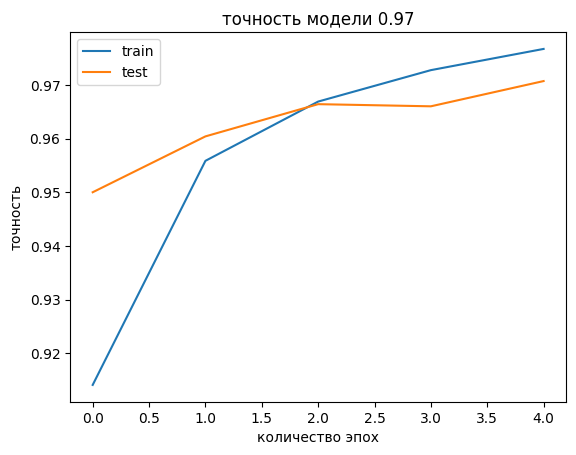

In [197]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(f"точность модели {round(model_2.evaluate(x_test, y_test_cat)[1], 2)}")
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


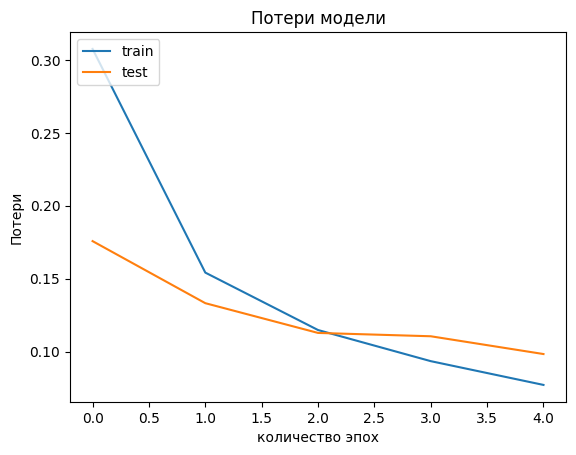

In [198]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

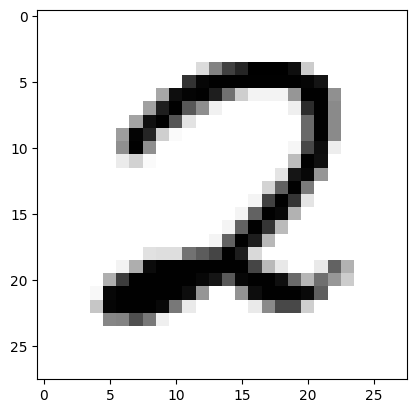

1/1 [==============================] - 0s 57ms/step
Цифра: 2


In [199]:
index = 35

plt.imshow(x_test[index].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

x = x_test[index]
x = np.expand_dims(x, axis=0)

prediction = model_2.predict(x)
prediction = np.argmax(prediction[0])

print("Цифра:", prediction)

In [200]:
gdd.download_file_from_google_drive(file_id="16dXFPQ7XzN0YhvDB8b68IdVPKIUdBL-q",
                                    dest_path="./sample_data/Eight.bmp",
                                    unzip=False)

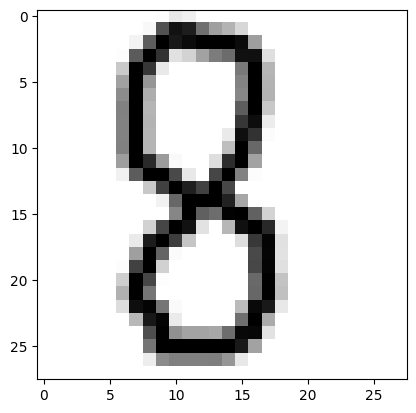

1/1 [==============================] - 0s 24ms/step
цифра: 8


In [201]:
img = image.load_img("./sample_data/Eight.bmp")

img = img.resize((28,28))
img = img.convert('L')
img = np.array(img)

plt.imshow(img, cmap=plt.cm.binary)
plt.show()

img = img.reshape(1,28,28)
img = img/255.0

prediction = model_2.predict(img)
prediction = np.argmax(prediction)
print("цифра:", prediction)